# Numpy

In [1]:
import numpy as np
from math import sqrt

create a numpy array with the elements [1,2,3,4]

In [2]:
array = np.array([1,2,3,4])
array

array([1, 2, 3, 4])

Use np.ones, np.zeros to create an array of 1’s with dimension 3x4 and an array of 0’s with  dimension 4x3

In [3]:
ones_array = np.ones((3, 4))
ones_array

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [4]:
zeros_array = np.zeros((4, 3))
zeros_array

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Create a 2x3 matrix A and a 3x4 matrix B and perform a matrix multiplication using numpy.

In [5]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2,3,4],[5,6,7,8],[9,1,2,3]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
B

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 1, 2, 3]])

In [7]:
S = np.dot(A,B)
S

array([[38, 17, 23, 29],
       [83, 44, 59, 74]])

Find the eigenvalues and eigenvectors of the matrix ([3,1],[1,2])

In [8]:
C = np.array([[3,1],[1,2]])
val, vec = np.linalg.eig(C)
print("val:", val)
print("vec:", vec)

val: [3.61803399 1.38196601]
vec: [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


# Matplotlib

In [9]:
import matplotlib.pyplot as plt

Create a line plot of the sine function over the interval [0, 2π] using Matplotlib.

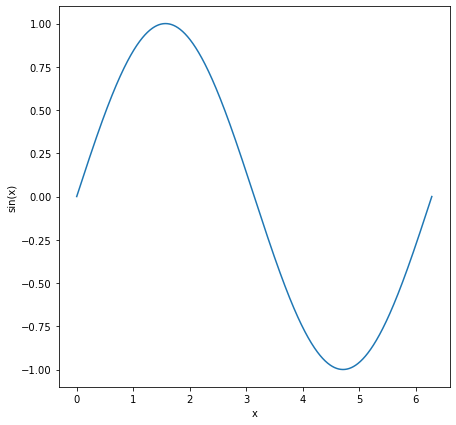

In [10]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)
plt.figure(figsize=(7, 7))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)') 
plt.show()

Plot the 3d graph of the function given below using Matplotlib

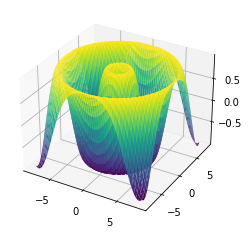

In [11]:
# Define the function
x = np.linspace(-8, 8, 200)
y = np.linspace(-8, 8, 200)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,cmap='viridis')

plt.show()

# SciPy

3.4 Solve The linear System of equations given below using Scipy 

In [12]:
from scipy.linalg import solve

In [13]:
A = np.array([[3, 1],
              [1, 2]])

b = np.array([9, 8])

# Solve the system of equations
x = solve(A, b)

print("The solution is:", x)

The solution is: [2. 3.]


Find the minimum of the function given below using Scipy's optimization module 

In [14]:
 from scipy.optimize import minimize 

In [15]:
def y(x):
    return x**2 + 2*x

# Find the minimum
result = minimize(y, 0)
print("Minimum at x =", result.x)


Minimum at x = [-1.00000001]


Perform the Fourier transformation of the function given below using SciPy. Plot the frequency
response using matplotlib

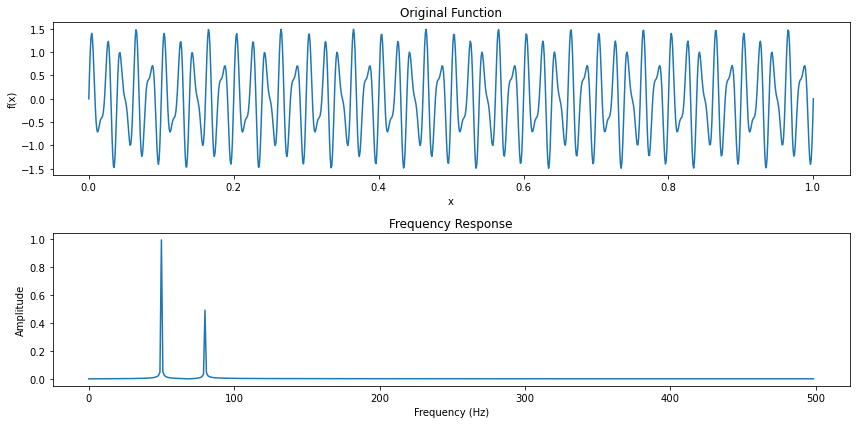

In [16]:
from scipy.fft import fft, fftfreq

def f(x):
    return np.sin(100 * np.pi * x) + 0.5 * np.sin(160 * np.pi * x)

# Create an array of x values
x = np.linspace(0, 1, 1000)
y = f(x)

# Perform the Fourier transform using SciPy
y_fft = fft(y)
n = len(x)
xf = fftfreq(n, (x[1] - x[0]))[:n//2]  # Frequency axis

# Plot the original function
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title('Original Function')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot the frequency response
plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/n * np.abs(y_fft[:n//2]))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


# OpenCV

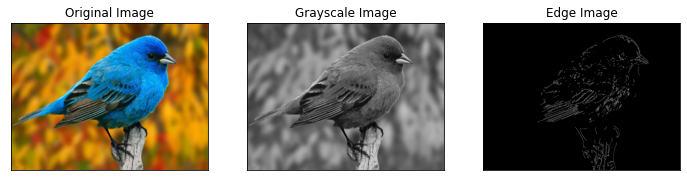

In [17]:
import cv2 as cv
image = cv.imread('bird.jpg')
original = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img = cv.imread('bird.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.figure(figsize=(12, 6))
plt.subplot(131),plt.imshow(original)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

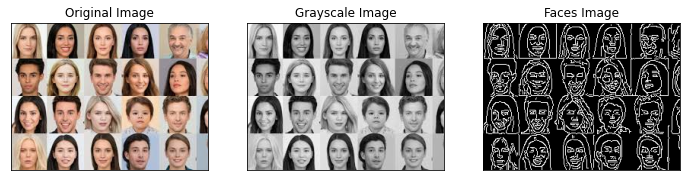

In [18]:
import cv2 as cv
image = cv.imread('faces.jpg')
img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray = cv.imread('faces.jpg', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"


edges = cv.Canny(img,100,200)
plt.figure(figsize=(12, 6))
plt.subplot(131),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gray,cmap = 'gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Faces Image'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Faces Image'), ([], []), ([], []))

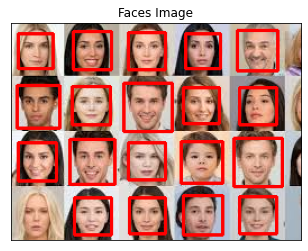

In [19]:
import sys
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
 
img = cv.imread('faces.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=8, minSize=(20, 20))
 

for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
 

cv.imshow('Face Detection', img)
plt.subplot(111),plt.imshow(img)
plt.title('Faces Image'), plt.xticks([]), plt.yticks([])